<a href="https://colab.research.google.com/github/uelkariuki/Data_science/blob/master/Uel_Kariuki_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Name: Uel Kariuki
Date: 4/7/2025

This task involves the classification of supervised machine learning models by
building and evaluating various models.
'''


'\nName: Uel Kariuki\nDate: 4/7/2025\n\nThis task involves the classification of supervised machine learning models by \nbuilding and evaluating various models.\n'

Importing required libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



Load the dataset



In [ ]:
# Load the dataset and convert to dataframe
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Explore the dataset

In [ ]:
# Get an overview of the data
# Check the number of samples(rows) and features(columns)
print(X.shape, y.shape)


(178, 13) (178,)


In [ ]:
# Perform a quick sanity check by checking the first few rows and columns names
print(X.head())
print(X.columns)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [ ]:
# check for missing values
print(X.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [ ]:
# check target variable distribution
print(y.value_counts())
print(y.value_counts(normalize=True))

target
1    71
0    59
2    48
Name: count, dtype: int64
target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64


In [ ]:
# check for the spread of the features
print(X.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

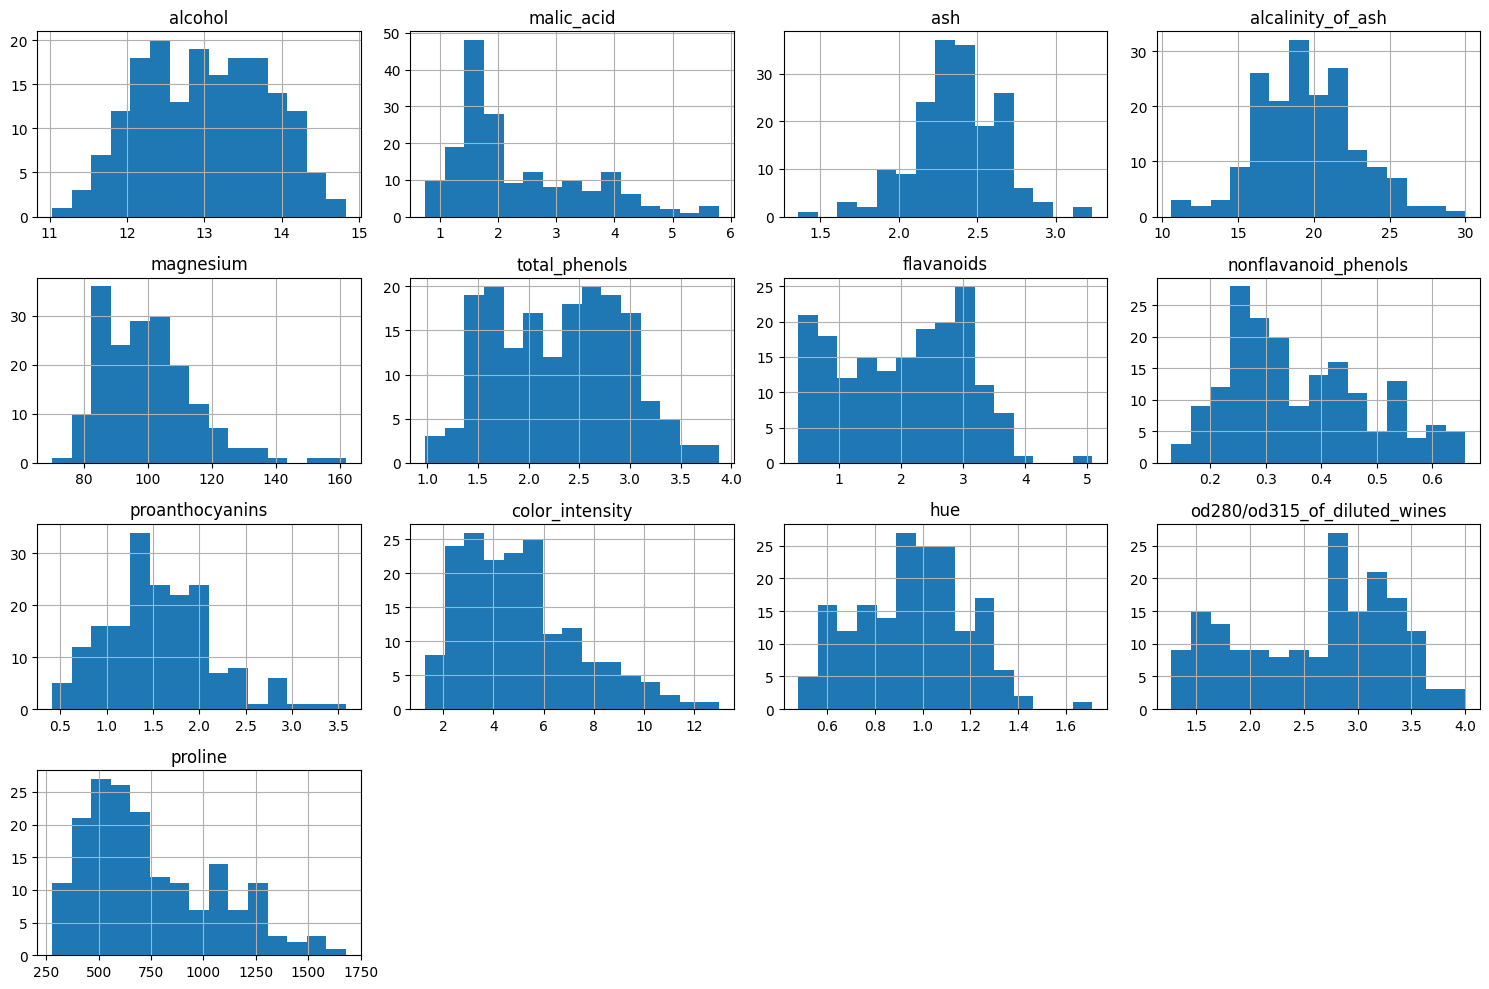

In [ ]:
# check for skewness
X.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


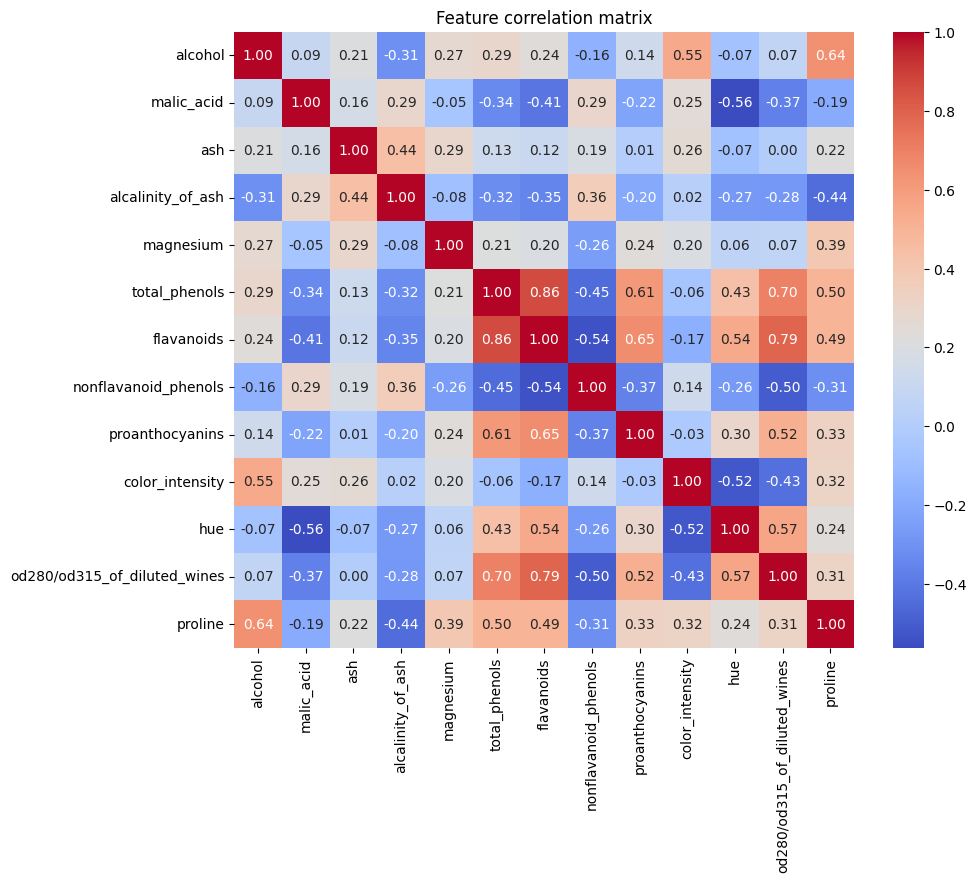

In [ ]:
# correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature correlation matrix')
plt.show()

Data preparation

In [ ]:
# splitting the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y )
print(f"Training data size (samples): {X_train.shape[0]}")
print(f"Testing data size (samples): {X_test.shape[0]}")



Training data size (samples): 124
Testing data size (samples): 54


In [ ]:
# Scaling the data to make the features have similar ranges
scaler = StandardScaler()
# scaler trained on training data
X_train_scaled = scaler.fit_transform(X_train)
# trained scaler used to adjust the test data
X_test_scaled = scaler.transform(X_test)

# convert back to  dataframe to see them nicely with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())




    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.982686   -0.527640  0.173598          -1.087543  -0.727661   
1  0.957937   -0.745511  1.255504           0.839386   0.063252   
2  0.401078   -0.612894  1.777803          -1.235769   0.656436   
3  0.772317   -0.593949 -0.012937          -0.168547   0.392799   
4 -1.863482    0.107025  0.210905           0.098259  -0.266295   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.491455    0.791460             -0.596717         0.354587   
1       1.131923    1.306553             -0.596717         1.343233   
2       0.491455    0.707363             -0.170491        -0.425924   
3       0.907759    1.243480             -1.193434         0.597412   
4       0.971806    0.822996             -0.340981         0.389276   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.255419  0.857462                      0.437825  1.863180  
1         0.297587  1.032095

setup for results and plotting

In [ ]:
# dataframe to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Macro Avg)'
,'Recall (Macro Avg)', 'F1-Score (Macro Avg),'])

In [ ]:
# Helper function for confusion matrix plotting
def plot_conf_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names,yticklabels=wine.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix: {title}')
  plt.show()


Building and evaluating the **models**

In [ ]:
# dictionary where each key is the name of a model like Logistic Regression and
# each value is another dictionary containing:
# model: actual scikit-learn model like Logistic Regression()
# data: a tuple containing the training data, testing data that the specific
# model should use
models_to_evaluate = {
    "Logistic Regression": {"model": LogisticRegression(random_state=42, max_iter=200), "data": (X_train_scaled, X_test_scaled)},
    "Decision Tree": {"model": DecisionTreeClassifier(random_state=42), "data": (X_train, X_test)},
    "Random Forest": {"model": RandomForestClassifier(random_state=42), "data": (X_train, X_test)},
    "K-Nearest Neighbors(KNN)": {"model": KNeighborsClassifier(n_neighbors=5), "data": (X_train_scaled, X_test_scaled)},
    "Naive Bayes (GaussianNB)": {"model": GaussianNB(), "data": (X_train_scaled, X_test_scaled)},
    "Support Vector Machines (SVM)": {"model": SVC(random_state=42), "data": (X_train_scaled, X_test_scaled)}

}


Evaluating Logistic Regression.
Logistic Regression model trained.
Accuracy:  0.9815
Classification report
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



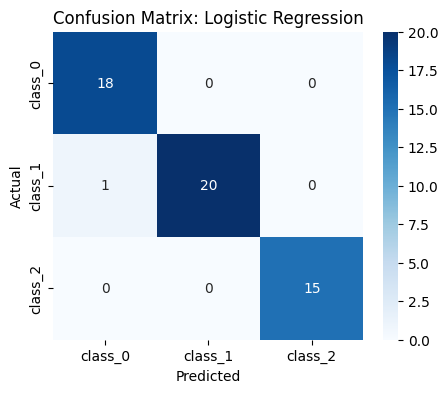


Evaluating Decision Tree.
Decision Tree model trained.
Accuracy:  0.9630
Classification report
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



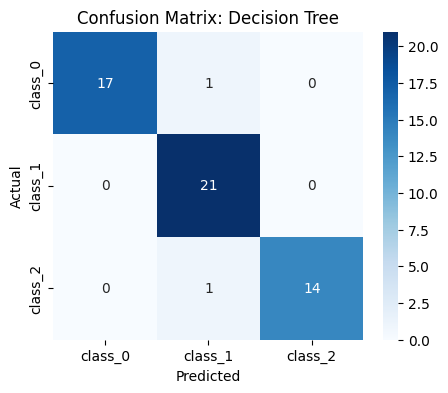


Evaluating Random Forest.
Random Forest model trained.
Accuracy:  1.0000
Classification report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



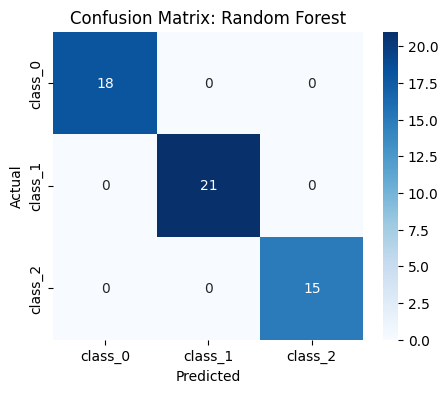


Evaluating K-Nearest Neighbors(KNN).
K-Nearest Neighbors(KNN) model trained.
Accuracy:  0.9444
Classification report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



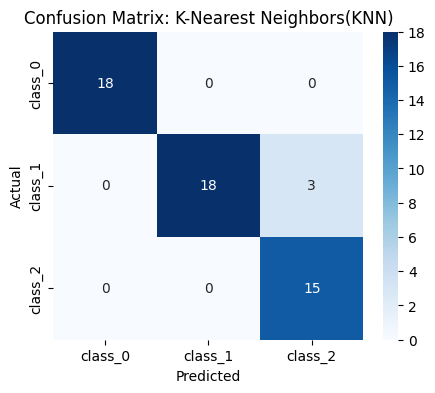


Evaluating Naive Bayes (GaussianNB).
Naive Bayes (GaussianNB) model trained.
Accuracy:  1.0000
Classification report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



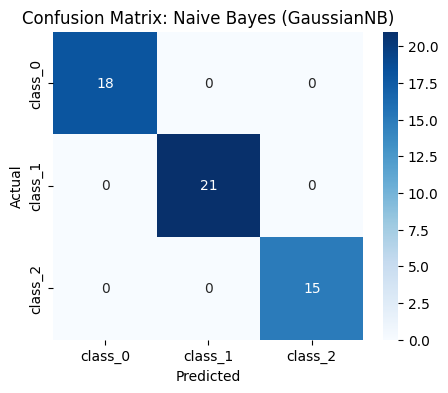


Evaluating Support Vector Machines (SVM).
Support Vector Machines (SVM) model trained.
Accuracy:  0.9815
Classification report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



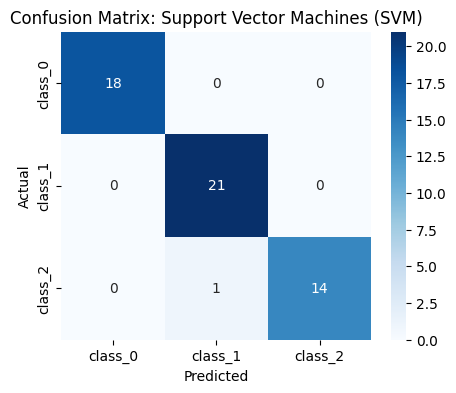

In [ ]:
# use a for loop to iterate through each item in the dictionary
for model_name, model_info in models_to_evaluate.items():
  # extract actual model object from model_info
  model = model_info["model"]
  # extract the training and testing data for the specific model
  X_train_data, X_test_data = model_info["data"]

  print(f"\nEvaluating {model_name}.")

  # train the model
  # fit method teaches the model to find patterns in the training data(X_train_data)
  # to predict the target labels (y_train)
  model.fit(X_train_data, y_train)
  print(f"{model_name} model trained.")

  # make predictions
  # predict method uses the trained model to predict the target labels for the
  # unseen data (X_test_data)
  y_pred = model.predict(X_test_data)

  # calculation and printing of metrics
  # model evaluation
  # accuracy_score: Calculates the overall proportion of correct predictions
  accuracy = accuracy_score(y_test, y_pred)
  # classification_report: Produces a detailed report (precision, recall, F1-Score)
  # for each class
  # if output_dict = True, it makes it easier to extract specific values for the
  # 'results' Dataframe.
  report = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)
  print(f"Accuracy: {accuracy: .4f}")
  print("Classification report")
  readable_classification_report = classification_report(y_test, y_pred, target_names=wine.target_names)
  print(readable_classification_report)

  # plotting the confusion matrix
  plot_conf_matrix(y_test, y_pred, model_name)

  results.loc[len(results)] = [
      model_name,
      accuracy,
      report['macro avg']['precision'],
      report['macro avg']['recall'],
      report['macro avg']['f1-score'],
   ]


Comparison of the models

In [ ]:
print("Model comparison summary")
# reset_index=True creates a clean, new numerical index after sorting
results_sorted = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
# use of to_string() to ensure all rows and columns are shown
print(results_sorted.to_string())

Model comparison summary
                           Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  F1-Score (Macro Avg),
0       Naive Bayes (GaussianNB)  1.000000               1.000000            1.000000               1.000000
1                  Random Forest  1.000000               1.000000            1.000000               1.000000
2  Support Vector Machines (SVM)  0.981481               0.984848            0.977778               0.980754
3            Logistic Regression  0.981481               0.982456            0.984127               0.982861
4                  Decision Tree  0.962963               0.971014            0.959259               0.963830
5       K-Nearest Neighbors(KNN)  0.944444               0.944444            0.952381               0.944056
